# Illustration du fonctionnement de KMeans

Commençons par créer un dataset artificiel

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 1500
random_state = 12

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X.shape

(1500, 2)

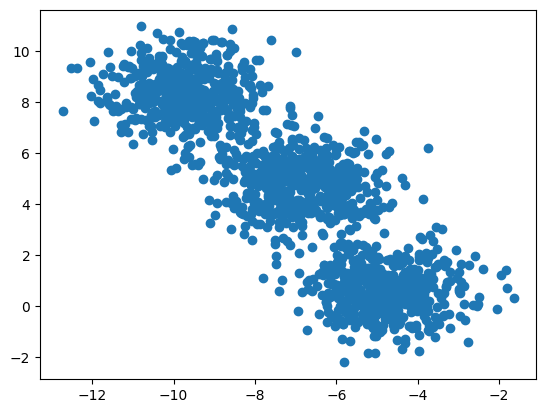

In [2]:
plt.scatter(X[:, 0], X[:, 1]);

Nous avons généré 3 centres avec des données réparties (avec un peu d'aléatoire) autour de ces centres. Ainsi, nous aimerions arriver à obtenir le clustering le plus proche du suivant :

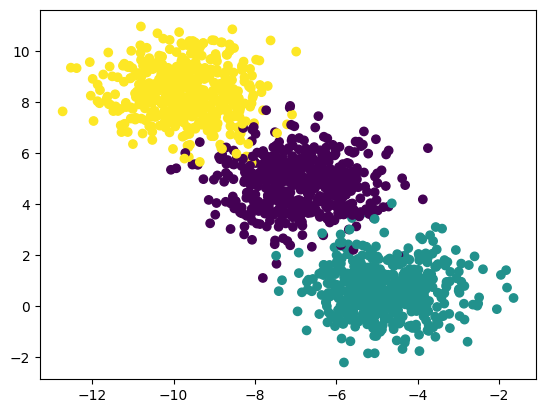

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y);

## Principe de fonctionnement

### On commence par choisir 3 centroides de clusters

In [4]:
from sklearn.metrics import pairwise_distances_argmin
import numpy as np

# 1. Randomly choose clusters
n_clusters = 3

rng = np.random.RandomState(random_state)
i = rng.permutation(X.shape[0])[:n_clusters]
centers = X[i]
print(i)
print(centers)

[1160  667  949]
[[-5.8632403   1.37365687]
 [-7.57420376  5.87163268]
 [-3.7588659   0.99033396]]


### On affecte ensuite chaque point au cluster représenté par le centroide le plus proche

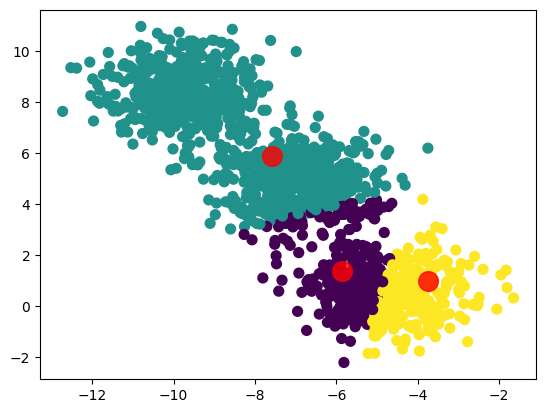

In [5]:
labels = pairwise_distances_argmin(X, centers)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8);

### On calcule le centroide des clusters nouvellement formés

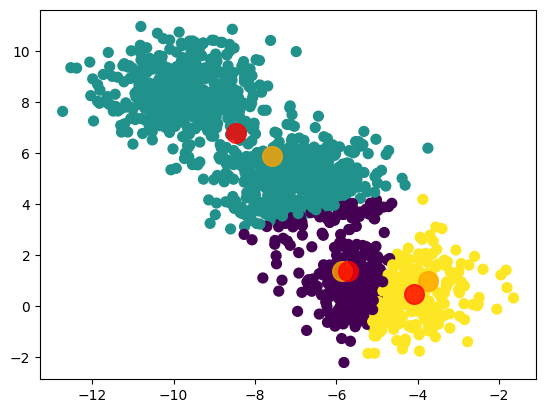

In [6]:
new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.8);
plt.scatter(new_centers[:, 0], new_centers[:, 1], c='red', s=200, alpha=0.8);

### Et on recommence jusqu'à convergence de l'algorithme

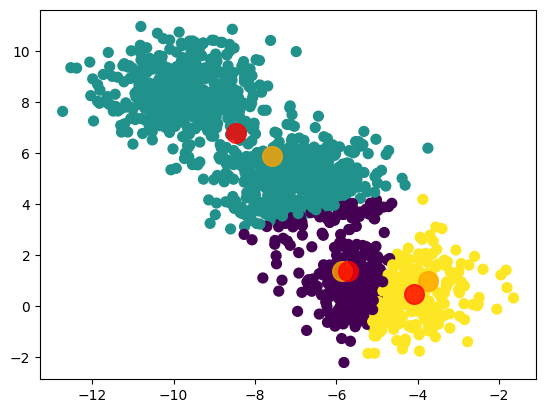

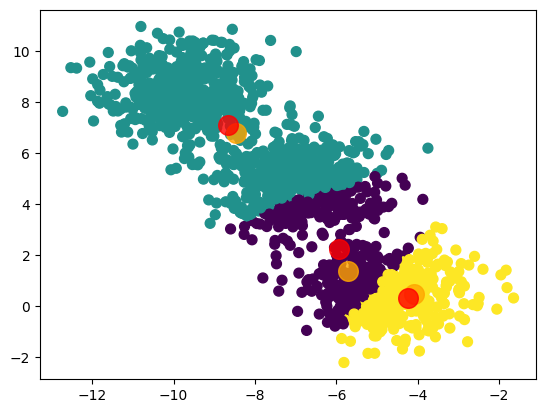

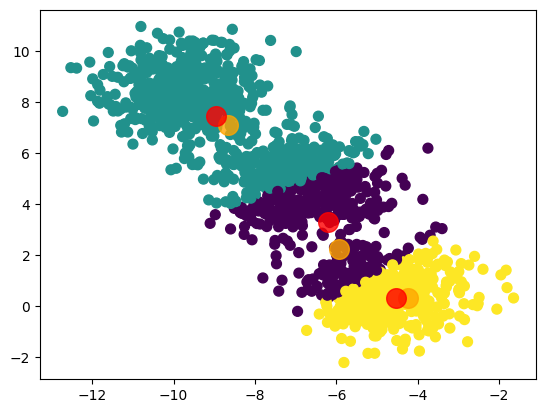

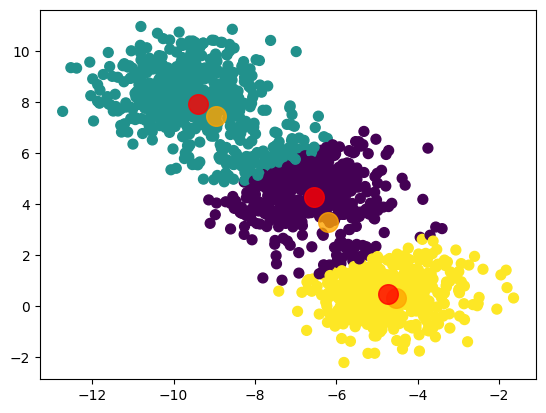

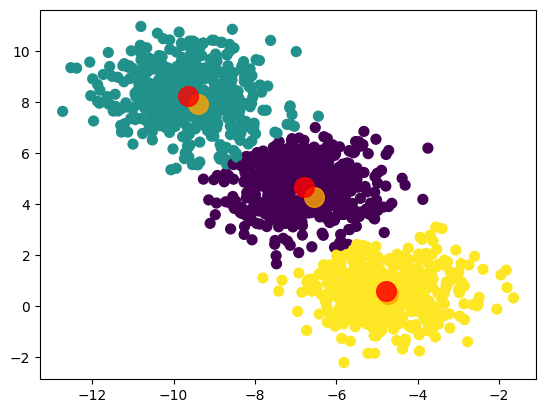

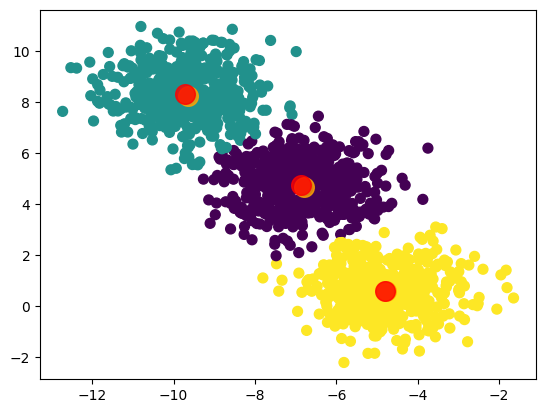

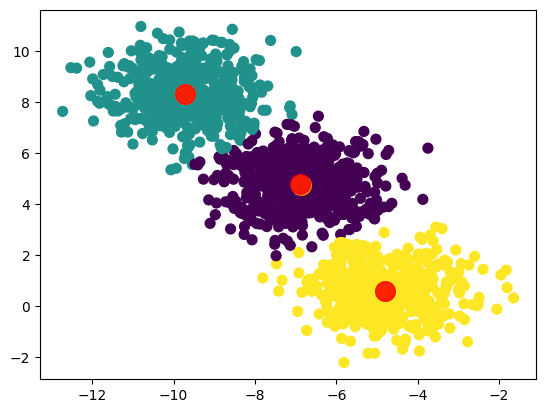

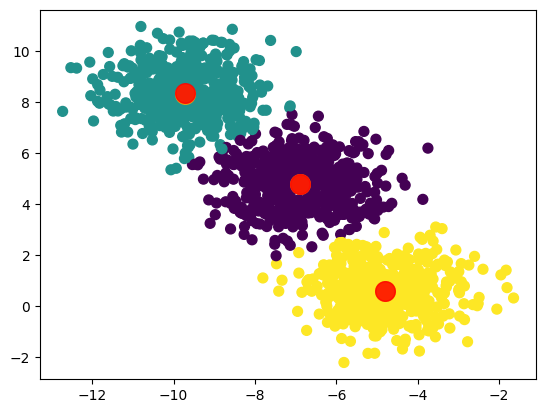

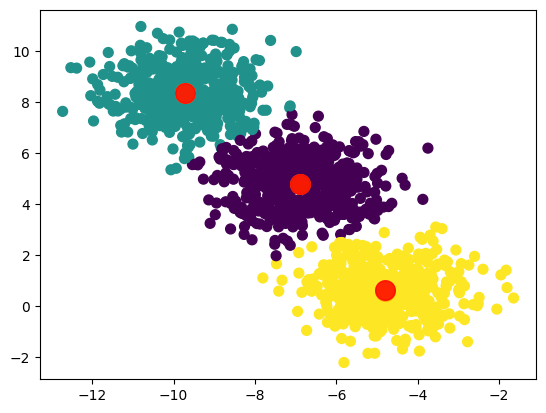

In [7]:
#new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
while True:
    # 2a. Assign labels based on closest center
    labels = pairwise_distances_argmin(X, centers)
    
    # 2b. Find new centers from means of points
    new_centers = np.array([X[labels == i].mean(0)
                            for i in range(n_clusters)])
    
    # 2c. Check for convergence
    if np.all(centers == new_centers):
        break

    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
    plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.8);
    plt.scatter(new_centers[:, 0], new_centers[:, 1], c='red', s=200, alpha=0.8);
    
    centers = new_centers

    plt.show()

# Dans la vraie vie, avec Scikit learn c'est beaucoup plus simple

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=random_state)

In [9]:
labels = kmeans.fit_predict(X)

/Users/cussat/.venvs/ML/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


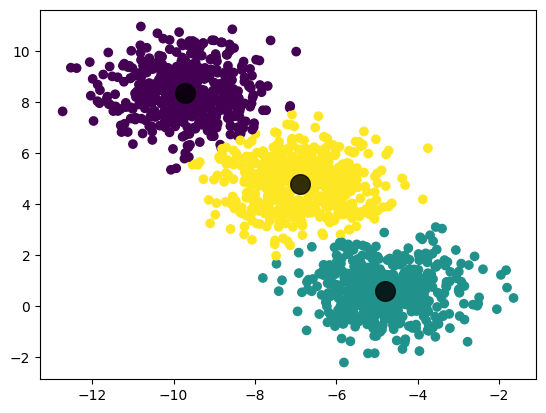

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=labels);
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.8);

et voilà !

# Limites de KMeans

## On doit connaitre K

/Users/cussat/.venvs/ML/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


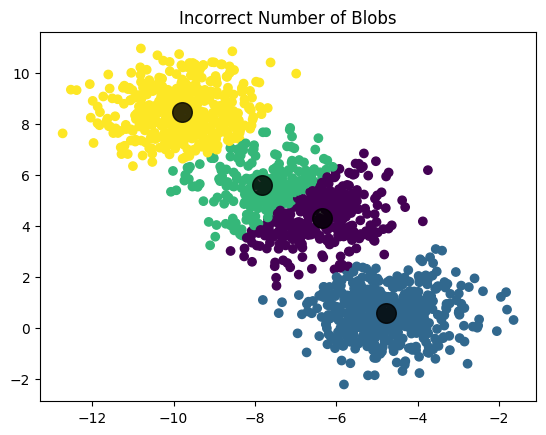

In [11]:
kmeans = KMeans(n_clusters=4, random_state=213)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.8)
plt.title("Incorrect Number of Blobs");

# Attention à la distribution des données

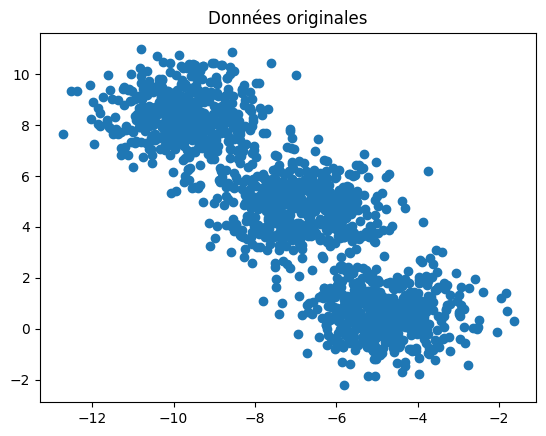

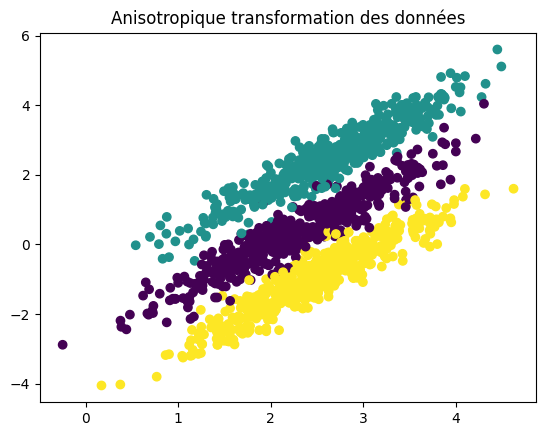

In [12]:
transformation = [[-0.60834549, -0.63667341], [-0.40887718, -0.85253229]]
X_aniso = np.dot(X, transformation)
plt.scatter(X[:, 0], X[:, 1]);
plt.title("Données originales");
plt.show()
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y);
plt.title("Anisotropique transformation des données");
plt.show()


/Users/cussat/.venvs/ML/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


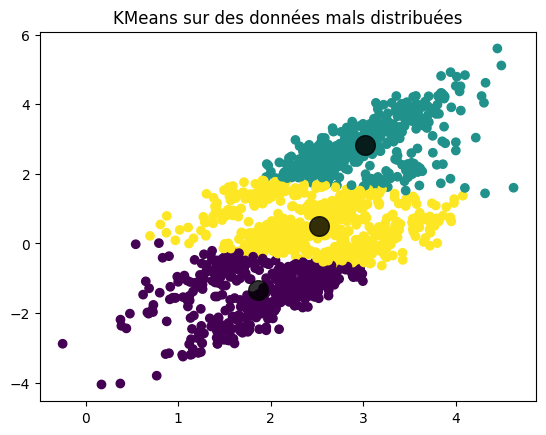

In [18]:
kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X_aniso)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred);
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.8);
plt.title("KMeans sur des données mals distribuées");


## Et à leur variance

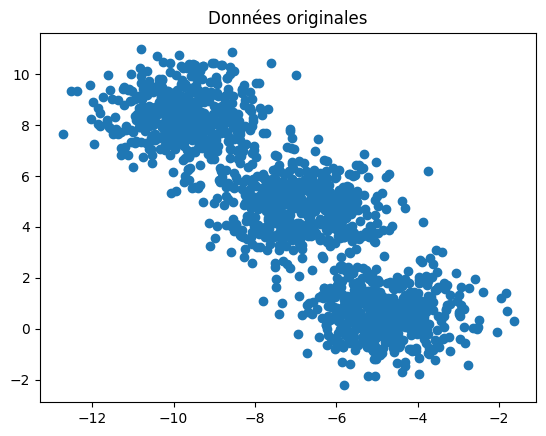

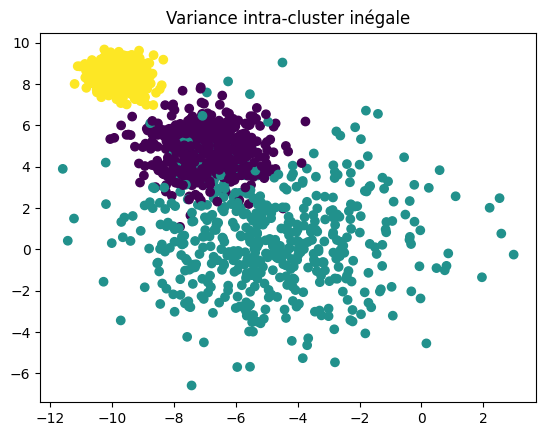

In [14]:
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
plt.scatter(X[:, 0], X[:, 1]);
plt.title("Données originales");
plt.show()
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied);
plt.title("Variance intra-cluster inégale");

/Users/cussat/.venvs/ML/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


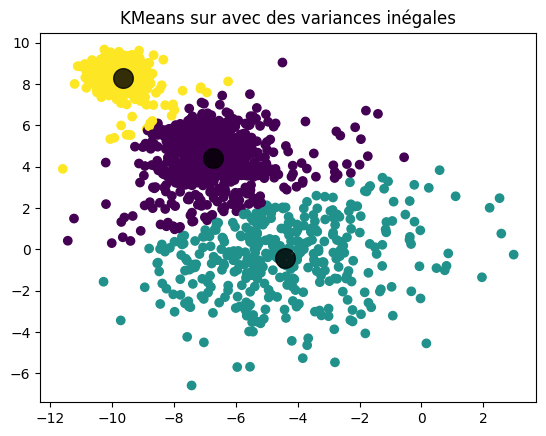

In [20]:
kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X_varied)

plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred);
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.8);
plt.title("KMeans sur avec des variances inégales");

## Ainsi que l'inégalité des cardinalités des clusters recherchés

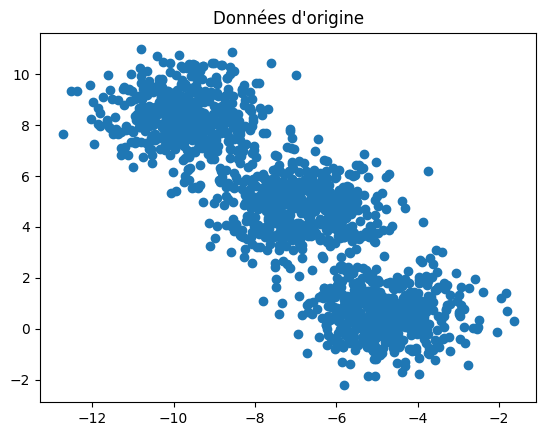

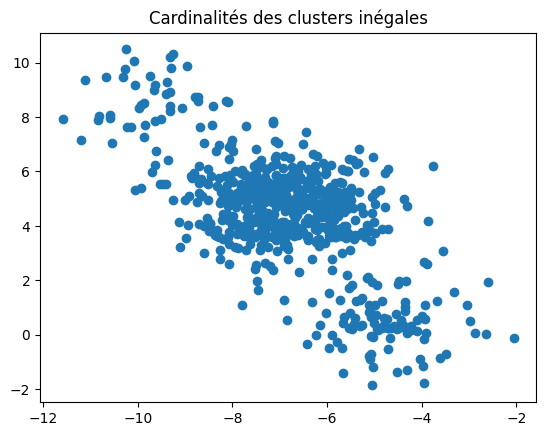

In [16]:
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:50]))

plt.scatter(X[:, 0], X[:, 1]);
plt.title('Données d\'origine')
plt.show();

plt.scatter(X_filtered[:, 0], X_filtered[:, 1]);
plt.title('Cardinalités des clusters inégales')
plt.show();

/Users/cussat/.venvs/ML/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


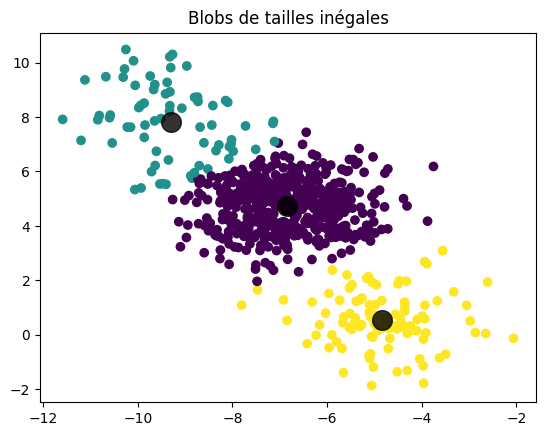

In [21]:
kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X_filtered)

plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred);
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.8);
plt.title("Blobs de tailles inégales");

## Quelques autres méthodes de clustering 

KMeans n'est pas le seul algorithme de clustering existant. Voici quelques exemples d'algorithmes présents dans scikit learn :

- `sklearn.cluster.KMeans`
- `sklearn.cluster.MeanShift`
- `sklearn.cluster.DBSCAN`
- `sklearn.cluster.AffinityPropagation`
- `sklearn.cluster.SpectralClustering`
- `sklearn.cluster.Ward`

Observons leur efficacité sur quelques datasets artificiels

<img src="figures/cluster_comparison.png" width="80%">